# Marketing Dashboard (UTM) — Notebook

In [4]:
from pathlib import Path
import pandas as pd

base = Path.cwd().parent                      # з notebooks -> в корінь репо
csv_path = base / "data" / "raw" / "marketing_utm_sample.csv"

df = pd.read_csv(csv_path)

# гарантуємо числові типи (інакше буде "no numeric data to plot")
for col in ["sessions","clicks","cost","conversions","revenue"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Rows:", len(df), " | Path:", csv_path)
df.head()


Rows: 819  | Path: c:\Users\Іван\Desktop\da-portfolio\data\raw\marketing_utm_sample.csv


,date,utm_source,utm_medium,utm_campaign,sessions,clicks,cost,conversions,revenue
0,2025-04-01,google,cpc,brand,454,379,415.84,25,1200.25
1,2025-04-01,google,cpc,prospecting,232,128,26.27,19,1103.45
2,2025-04-01,google,cpc,retargeting,366,330,157.88,10,602.73
3,2025-04-01,facebook,cpc,prospecting,307,241,288.12,21,1876.09
4,2025-04-01,facebook,cpc,retargeting,222,197,70.96,6,192.84


In [5]:
df["conversion_rate"] = df["conversions"] / df["sessions"]
df["cpa"]  = df["cost"] / df["conversions"].replace({0: pd.NA})
df["roas"] = df["revenue"] / df["cost"].replace({0: pd.NA})

by_source = df.groupby("utm_source", as_index=False).agg(
    sessions=("sessions","sum"),
    clicks=("clicks","sum"),
    cost=("cost","sum"),
    conversions=("conversions","sum"),
    revenue=("revenue","sum"),
)
by_source["roas"] = by_source["revenue"] / by_source["cost"].replace({0: pd.NA})
by_source.sort_values("roas", ascending=False)


,utm_source,sessions,clicks,cost,conversions,revenue,roas
1,facebook,48361,37294,25381.74,2087,125875.45,4.959292
3,instagram,46535,36303,26692.73,2134,128581.83,4.817111
2,google,74064,57672,40359.82,3339,192880.25,4.779017
0,email,50093,38758,0.00,2258,140812.38,<NA>


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

img_dir = base / "reports" / "images"
img_dir.mkdir(parents=True, exist_ok=True)

# 1) ROAS за джерелами (примусово робимо числа)
by_source["roas"] = pd.to_numeric(by_source["roas"], errors="coerce")
s = by_source.sort_values("roas", ascending=False)

fig, ax = plt.subplots()
ax.bar(s["utm_source"].astype(str), s["roas"].astype(float))
ax.set_title("ROAS за джерелами")
ax.set_ylabel("дохід / витрати")
fig.tight_layout()
fig.savefig(img_dir / "roas_by_source.png", dpi=140)
plt.close(fig)

# 2) CPA за кампаніями
by_campaign = df.groupby("utm_campaign", as_index=False).agg(
    cost=("cost","sum"),
    conversions=("conversions","sum")
)
by_campaign["cpa"] = by_campaign["cost"] / by_campaign["conversions"].replace({0: np.nan})
by_campaign["cpa"] = pd.to_numeric(by_campaign["cpa"], errors="coerce")
c = by_campaign.sort_values("cpa")

fig, ax = plt.subplots()
ax.bar(c["utm_campaign"].astype(str), c["cpa"].astype(float))
ax.set_title("CPA за кампаніями")
ax.set_ylabel("витрати / конверсії")
fig.tight_layout()
fig.savefig(img_dir / "cpa_by_campaign.png", dpi=140)
plt.close(fig)

print("Saved to:", img_dir)


Saved to: c:\Users\Іван\Desktop\da-portfolio\reports\images


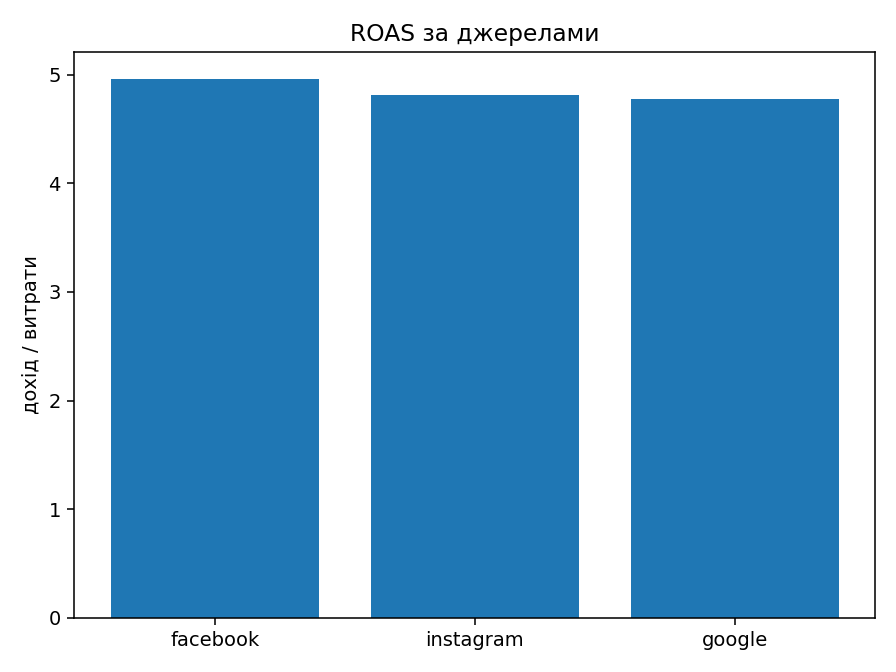

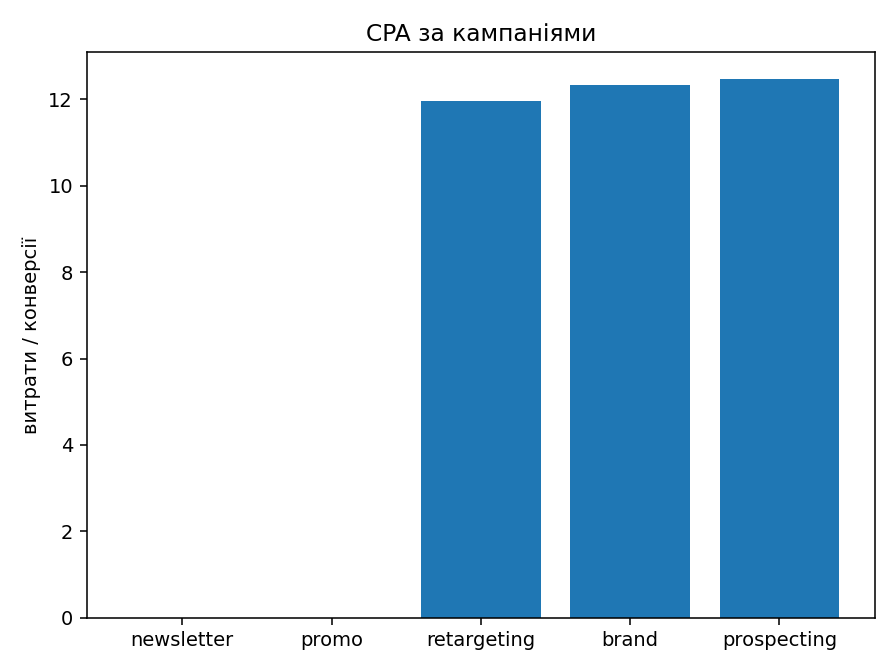

In [10]:
from IPython.display import Image, display
from pathlib import Path
base = Path.cwd().parent
display(Image(filename=str(base / "reports/images/roas_by_source.png")))
display(Image(filename=str(base / "reports/images/cpa_by_campaign.png")))